In [1]:
#Import required packages
import numpy as np
import pandas as pd
from textblob import TextBlob

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import strip_punctuation, strip_tags, strip_numeric
from nltk.stem.wordnet import WordNetLemmatizer   
from nltk.corpus import stopwords
import string
import pyLDAvis
import pyLDAvis.gensim

**DATA COLLECTION**

Import the CSV of reviews from Task 1

In [2]:
jeep_reviews = pd.read_csv('Reviews_1_Jeep.csv',usecols = ['Review'])
kia_reviews = pd.read_csv('Reviews_2_Kia.csv',usecols = ['Review'])
hector_reviews = pd.read_csv('Reviews_3_Hector.csv',usecols = ['Review'])

Out of all the three products, we have picked 'Jeep' as our client. We will find the topics using LDA (Unsupervised learning) and then compare other competitiors based on those topics (features/attributes)

In [3]:
print("Number of Jeep reviews : "+str(len(jeep_reviews)))
jeep_reviews.head()

Number of Jeep reviews : 176


,Review
0,Good SUV But Engine Makes Lot Of NoisesBought ...
1,Excellent car.It's a great car. I have a Jeep ...
2,Excellent SUVJeep Compass is the most efficien...
3,Not satisfied.Too many issues with the clutch ...
4,Value for money.Its been nearly 2 years of my ...


**DATA CLEANSING AND PREPROCESSING**

In [4]:
# Preprocessing & cleaning using NLTK
lemma = WordNetLemmatizer()

stop_words = stopwords.words('english')

def textClean(text0):
    text1 = [strip_punctuation(doc) for doc in text0]
    text1 = [strip_tags(doc) for doc in text1]
    text1 = [strip_numeric(doc) for doc in text1]
    text1 = [[" ".join([i for i in doc.lower().split() if i not in stop_words])] for doc in text1]
    text2 = [[word for word in ' '.join(doc).split()] for doc in text1]
    normalized = [[" ".join([lemma.lemmatize(word) for word in ' '.join(doc).split()])] for doc in text1]
    return normalized

corpus1 = textClean(jeep_reviews.Review)  # corpus cleaned of html tags, puncs, lemmas

**TOPIC MODELING**

Using LDA model

In [5]:
# Build LDA model for 4 topics using Gensim
corpus2 = [[word for word in ' '.join(doc).split()] for doc in corpus1]  # word_tokenize first
id2word = corpora.Dictionary(corpus2)  # Create Dictionary
corpus = [id2word.doc2bow(text) for text in corpus2]  

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4)

In [6]:
lda_model.show_topics(num_topics=4,num_words=10)

[(0,
  '0.034*"jeep" + 0.032*"compass" + 0.027*"car" + 0.018*"read" + 0.010*"suv" + 0.009*"good" + 0.008*"drive" + 0.008*"amazing" + 0.007*"look" + 0.007*"feature"'),
 (1,
  '0.020*"read" + 0.019*"jeep" + 0.013*"good" + 0.013*"car" + 0.012*"road" + 0.011*"look" + 0.010*"drive" + 0.009*"great" + 0.009*"quality" + 0.009*"vehicle"'),
 (2,
  '0.053*"car" + 0.042*"jeep" + 0.033*"compass" + 0.020*"read" + 0.015*"good" + 0.014*"best" + 0.013*"suv" + 0.009*"great" + 0.009*"feature" + 0.009*"quality"'),
 (3,
  '0.011*"jeep" + 0.010*"compass" + 0.009*"car" + 0.008*"best" + 0.006*"drive" + 0.006*"great" + 0.006*"read" + 0.005*"feature" + 0.004*"power" + 0.004*"driving"')]

In [7]:
#Visualizing topics using pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)


/Applications/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.045808  0.002852       1        1  51.225136
0      0.031081  0.014966       2        1  24.742804
1     -0.022946 -0.050230       3        1  19.852051
3     -0.053943  0.032412       4        1   4.180005, topic_info=     Category        Freq         Term       Total  loglift  logprob
3     Default  119.000000      compass  119.000000  30.0000  30.0000
60    Default   40.000000         best   40.000000  29.0000  29.0000
43    Default   32.000000        great   32.000000  28.0000  28.0000
297   Default   33.000000        drive   33.000000  27.0000  27.0000
12    Default  150.000000         jeep  150.000000  26.0000  26.0000
36    Default   26.000000      driving   26.000000  25.0000  25.0000
22    Default   36.000000         road   36.000000  24.0000  24.0000
21    Default   83.000000         read   83.000000  23.0000  23.0000
147   Default   23.000000      vehicle   23.000000  22.0000  22.0000
55    Default   20.000000        power   20.000000  21.0000  21.0000
40    Default   12.000000         feel   12.000000  20.0000  20.0000
171   Default   11.000000      comfort   11.000000  19.0000  19.0000
261   Default    5.000000        india    5.000000  18.0000  18.0000
670   Default   15.000000  compassjeep   15.000000  17.0000  17.0000
68    Default   22.000000   experience   22.000000  16.0000  16.0000
541   Default   10.000000       smooth   10.000000  15.0000  15.0000
98    Default   11.000000         high   11.000000  14.0000  14.0000
69    Default   34.000000      feature   34.000000  13.0000  13.0000
31    Default  162.000000          car  162.000000  12.0000  12.0000
135   Default    9.000000        first    9.000000  11.0000  11.0000
116   Default   33.000000         look   33.000000  10.0000  10.0000
34    Default    9.000000          day    9.000000   9.0000   9.0000
325   Default   11.000000       petrol   11.000000   8.0000   8.0000
597   Default    4.000000         real    4.000000   7.0000   7.0000
578   Default    8.000000            l    8.000000   6.0000   6.0000
6     Default   21.000000       engine   21.000000   5.0000   5.0000
65    Default    5.000000     designed    5.000000   4.0000   4.0000
29    Default    9.000000            x    9.000000   3.0000   3.0000
197   Default   12.000000       safety   12.000000   2.0000   2.0000
183   Default    7.000000         come    7.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
261    Topic4    0.763393        india    5.586646   1.1845  -5.4883
407    Topic4    0.440382          man    2.687125   1.3663  -6.0385
1183   Topic4    0.349653     discount    1.954028   1.4542  -6.2692
397    Topic4    0.346286         life    1.928187   1.4578  -6.2788
418    Topic4    0.570481         gear    4.865353   1.0314  -5.7796
60     Topic4    1.550982         best   40.478676  -0.0870  -4.7795
65     Topic4    0.537891     designed    5.127424   0.9202  -5.8385
40     Topic4    0.794209         feel   12.979599   0.3811  -5.4488
297    Topic4    1.153187        drive   33.845860  -0.2044  -5.0758
43     Topic4    1.120838        great   32.555561  -0.1940  -5.1043
12     Topic4    1.979218         jeep  150.145874  -1.1540  -4.5357
3      Topic4    1.808749      compass  119.931183  -1.0194  -4.6257
171    Topic4    0.712323      comfort   11.444358   0.3981  -5.5576
578    Topic4    0.649027            l    8.817583   0.5658  -5.6506
31     Topic4    1.735667          car  162.494644  -1.3644  -4.6670
55     Topic4    0.815821        power   20.138865  -0.0314  -5.4219
69     Topic4    0.931996      feature   34.312733  -0.4311  -5.2888
21     Topic4    1.099200         read   83.633492  -1.1570  -5.1238
36     Topic4    0.795317      driving   26.022209  -0.3131  -5.4474
541    Topic4    0.625073       smooth   10.377848   0.3653  -5.6882
29     Topic4    0.609114            x    9.8

So, based on the unsupervised learning model LDA, we identify the following topics discussed (along with relevant keyword)
1. Power - Power, engine, mileage, battery
2. Experience - performance, driving, experience, safety, service
3. Value for Money - Money, value, buy
4. Design - design, look, interior, sunroof

Let's find out the sentiments based on these topics by comparing the three products

**SENTIMENT ANALYSIS**

Don't strip punctuation since sentence tokenization is needed

In [8]:
def textCleanWithPunc(text0):
    text1 = [strip_tags(doc) for doc in text0]
    text1 = [strip_numeric(doc) for doc in text1]
    text1 = [[" ".join([i for i in doc.lower().split() if i not in stop_words])] for doc in text1]
    text2 = [[word for word in ' '.join(doc).split()] for doc in text1]
    normalized = [[" ".join([lemma.lemmatize(word) for word in ' '.join(doc).split()])] for doc in text1]
    return normalized

cleaned_jeep_corpus = textCleanWithPunc(jeep_reviews.Review) 
cleaned_kia_corpus = textCleanWithPunc(kia_reviews.Review) 
cleaned_hector_corpus = textCleanWithPunc(hector_reviews.Review) 

In [9]:
topic_power_keywords = ["power", "engine", "mileage", "battery"]
topic_experience_keywords = ["performance", "driving", "experience", "safety","service","handling"]
topic_money_keywords = ["money", "value", "buy"]
topic_design_keywords = ["design", "look", "interior", "sunroof","luxury","feel"]

Seggregate all the sentences in every review based on the topic discussed, along with the polarity score of the sentence.

In [10]:
jeep_topic_power = {}
jeep_topic_experience = {}
jeep_topic_money = {}
jeep_topic_design = {}

for review in cleaned_jeep_corpus:
    doc = TextBlob(review[0])
    for sentence in doc.sentences:
        if any(word in sentence for word in topic_power_keywords):
            jeep_topic_power[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_experience_keywords):
            jeep_topic_experience[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_money_keywords):
            jeep_topic_money[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_design_keywords):
            jeep_topic_design[sentence]=sentence.sentiment.polarity
            


jeep_topic_power_avg_polarity = np.array([jeep_topic_power[k] for k in jeep_topic_power]).mean()
jeep_topic_experience_avg_polarity = np.array([jeep_topic_experience[k] for k in jeep_topic_experience]).mean()
jeep_topic_money_avg_polarity = np.array([jeep_topic_money[k] for k in jeep_topic_money]).mean()
jeep_topic_design_avg_polarity = np.array([jeep_topic_design[k] for k in jeep_topic_design]).mean()

print("Average polarity for power in JEEP is "+str(jeep_topic_power_avg_polarity))
print("Average polarity for experience in JEEP is "+str(jeep_topic_experience_avg_polarity))
print("Average polarity for money value in JEEP is "+str(jeep_topic_money_avg_polarity))
print("Average polarity for design value in JEEP is "+str(jeep_topic_design_avg_polarity))

Average polarity for power in JEEP is 0.319304609499922
Average polarity for experience in JEEP is 0.32931028050540245
Average polarity for money value in JEEP is 0.2421551724137931
Average polarity for design value in JEEP is 0.3738110423882313


In [11]:
kia_topic_power = {}
kia_topic_experience = {}
kia_topic_money = {}
kia_topic_design = {}

for review in cleaned_kia_corpus:
    doc = TextBlob(review[0])
    for sentence in doc.sentences:
        if any(word in sentence for word in topic_power_keywords):
            kia_topic_power[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_experience_keywords):
            kia_topic_experience[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_money_keywords):
            kia_topic_money[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_design_keywords):
            kia_topic_design[sentence]=sentence.sentiment.polarity
            


kia_topic_power_avg_polarity = np.array([kia_topic_power[k] for k in kia_topic_power]).mean()
kia_topic_experience_avg_polarity = np.array([kia_topic_experience[k] for k in kia_topic_experience]).mean()
kia_topic_money_avg_polarity = np.array([kia_topic_money[k] for k in kia_topic_money]).mean()
kia_topic_design_avg_polarity = np.array([kia_topic_design[k] for k in kia_topic_design]).mean()

print("Average polarity for power in KIA is "+str(kia_topic_power_avg_polarity))
print("Average polarity for experience in KIA is "+str(kia_topic_experience_avg_polarity))
print("Average polarity for money value in KIA is "+str(kia_topic_money_avg_polarity))
print("Average polarity for design value in KIA is "+str(kia_topic_design_avg_polarity))

Average polarity for power in KIA is 0.4976747553278165
Average polarity for experience in KIA is 0.479041641779737
Average polarity for money value in KIA is 0.3055555555555555
Average polarity for design value in KIA is 0.4747809239135769


In [12]:
hector_topic_power = {}
hector_topic_experience = {}
hector_topic_money = {}
hector_topic_design = {}

for review in cleaned_hector_corpus:
    doc = TextBlob(review[0])
    for sentence in doc.sentences:
        if any(word in sentence for word in topic_power_keywords):
            hector_topic_power[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_experience_keywords):
            hector_topic_experience[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_money_keywords):
            hector_topic_money[sentence]=sentence.sentiment.polarity
        elif any(word in sentence for word in topic_design_keywords):
            hector_topic_design[sentence]=sentence.sentiment.polarity
            


hector_topic_power_avg_polarity = np.array([hector_topic_power[k] for k in hector_topic_power]).mean()
hector_topic_experience_avg_polarity = np.array([hector_topic_experience[k] for k in hector_topic_experience]).mean()
hector_topic_money_avg_polarity = np.array([hector_topic_money[k] for k in hector_topic_money]).mean()
hector_topic_design_avg_polarity = np.array([hector_topic_design[k] for k in hector_topic_design]).mean()

print("Average polarity for power in HECTOR is "+str(hector_topic_power_avg_polarity))
print("Average polarity for experience in HECTOR is "+str(hector_topic_experience_avg_polarity))
print("Average polarity for money value in HECTOR is "+str(hector_topic_money_avg_polarity))
print("Average polarity for design value in HECTOR is "+str(hector_topic_design_avg_polarity))

Average polarity for power in HECTOR is 0.5041183035714286
Average polarity for experience in HECTOR is 0.5085291026023785
Average polarity for money value in HECTOR is 0.33742380952380957
Average polarity for design value in HECTOR is 0.47303221414828556


**EMOTIONAL ANALYSIS**

Analyse the polarity of all the sentences, to see how emotional the customers are for Jeep (our client)

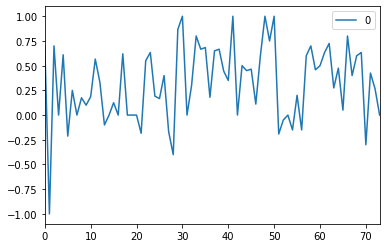

In [17]:
df = pd.DataFrame(jeep_topic_power.values())
df.plot.line()

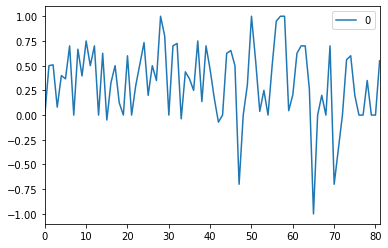

In [14]:
df = pd.DataFrame(jeep_topic_experience.values())
df.plot.line()

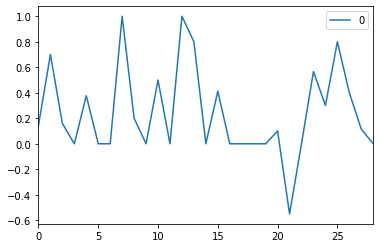

In [15]:
df = pd.DataFrame(jeep_topic_money.values())
df.plot.line()

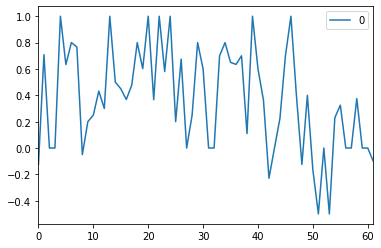

In [16]:
df = pd.DataFrame(jeep_topic_design.values())
df.plot.line()

**APPENDIX**

Preparing cleaned corpus CSV

In [18]:
corpus1 = textClean(jeep_reviews.Review)
df = pd.DataFrame(corpus1)
df.to_csv('cleaned_jeep_corpus.csv', encoding='utf-8')